***
***
# PERCEPTRON
***
***
author --- louis tomczyk<br>
institution --- Xidian University<br>
student id --- 211.561.13.752<br>
date --- 2021.11.06<br>
course --- X2 CS 10 26 - Machine Learning<br>
contact --- <louis.tomczyk.work@gmail.com><br>
bibliography --- <br>
- __[Multi-Class Classification and the Perceptron](https://jermwatt.github.io/machine_learning_refined/notes/7_Linear_multiclass_classification/7_3_Perceptron.html)__<br>
- __[implementation perceptron](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/)__
***
***

## 0/ Maintenance
***
the notations are :
- $file\_ name$ : the name of the file containing the dataset
- $df$ : the *DataFrame* containing the imported dataset
- $data$ : the imported data into a *numpy array* 

### 0.1/ librairies

In [1]:
# for plotting
import matplotlib.pyplot as plt

# for mathematical operations
import numpy as np

# for importing data from csv
import pandas as pd

# for spliting the dataset in n-subdatasets
from random import randrange

### 0.2/ importation

In [2]:
file_name   = "Data01.csv"
df          = pd.read_csv(file_name)
data        = df.to_numpy()

## 1/ Data
***

the notations are :
- $n_{samples}$ : the number of samples in the dataset
- $n_{features}$ : the number of features used to desribe the samples
- $x$ : the features matrix made of  $(n_{samples})$ rows and $(n_{features})$ columns
- $y$ : the targets

### 1.1/ format

In [3]:
x           = np.array([data.T[0], data.T[1]]).T
y           = data.T[2]
y           = y[np.newaxis,:].T
n_samples   = len(y)
n_features  = len(x[0])

### 1.2/ visualisation

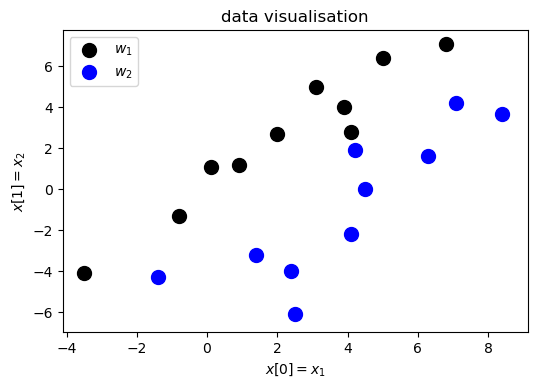

In [4]:
plt.figure(dpi=100)
plt.scatter(x.T[0][0:10],x.T[1][0:10],s=100,c='black',label="$w_1$")
plt.scatter(x.T[0][10:20],x.T[1][10:20],s=100,c='blue',label="$w_2$")
plt.xlabel("$x[0] = x_1$")
plt.ylabel("$x[1] = x_2$")
plt.title("data visualisation")
plt.legend(loc="upper left")
plt.show()

## 2/ Model : Single Layer Perceptron
***
The notations are :
- $w$ : weights
- $b$ : bias 
- $a$ : the activation value at the neuron output

The functions are : 
- *initialisation* : default values for the weights
- *model* : the activation of the neuron

In [5]:
# inputs : X - the features for each sample in the dataset
# output : the defaults values for weights (W) and bias (b)

def initialisation(x,method):


    if method == 'null':
        b = np.zeros(1)
        w = np.zeros((x.shape[1],1))

    if method == 'rand':
        b = np.random.randn(1)
        w = np.random.randn(x.shape[1], 1)

    return (b,w)

In [6]:
# inputs : 
#   X - the features for each sample in the dataset
#   W - the weights
#   b - the bias

# outputs :
#   A - the activation of the neuron

def model(x,b,w):

    z = x.dot(w) + b
    a = 1 / (1 + np.exp(-z))
    
    return a

## 3/ Cost function
***
the notations are :
- $\mathcal{LL}$ : the logarithm of the losses calcualted upon the likelihood theory

the functions are :
- *log_loss* : to calculate the cross-entropy which is defined as : <br>
$\mathcal{LL}(a,y) = \dfrac{1}{n_{samples}}\cdot \sum_{k=1}^{n_{samples}}\ \bigg[y[k]\cdot ln\big(a[k])+(1-y[k]\big)\cdot ln\big(1-a[k]\big)\bigg]$

In [7]:
# inputs :
#   a - the activation functions for the neurons
#   y - the targets

# outputs :
#   the cross-entropy

def log_loss(a, y):
    return 1/n_samples*np.sum(-y*np.log(a)-(1-y)*np.log(1-a))

## 4/ Gradients
***
the functions are : <br>
- *gradients* : to calculate the correction of the weights given by the gradient of the cross-entropy :
    - $\delta w = \vec{grad}_{w}\big(\mathcal{LL}\big)=\dfrac{1}{n}\cdot \sum_{k=1}^{n_{samples}}\ \Bigg[\bigg(a(x[k])-y[k])\bigg)\cdot x[k]\Bigg]$
    - $\delta b = \vec{grad}_{b}\big(\mathcal{LL}\big) = \dfrac{1}{n}\cdot \sum_{k=1}^{n_{samples}}\ \bigg[a[k]-y[k])\bigg]$


In [8]:
# inputs :
#   a : the activation values
#   x : the features of each sample
#   y : the targets

# output :
#   dw : the corrected weights
#   db : the corrected bias

def gradients(a, x, y):

    db = 1 / n_samples * np.sum(a-y)
    dw = 1 / n_samples * np.dot(x.T, a-y)
        
    return (db,dw)

## 5/ Parameters update
***
the notations are :
- $\alpha$ : the learning rate


the functions are :
- *update* : to correct the bias and weights values at the learning_rate speed such as at the time $(t+1)$
    - $w(t+1) = w(t) - \alpha\cdot \delta w(t)$ <br>
    - $b(t+1) = b(t) - \alpha\cdot \delta b(t)$

In [9]:
# inputs :
#   - b     : the bias at time (t)
#   - w     : the weight at time (t)
#   - db    : the bias correction at time (t)
#   - dw    : the weights correction at time (t)
#   - alpha : the learning rate

# output :
#   - b     : the new bias
#   - w     : the new weights

def update(b,w,db,dw, alpha):

    b = b - alpha * db
    w = w - alpha * dw
        
    return (b,w)

## 6/ Perceptron
***
the notations are :
- $n_{iterations}$ : the number of iterations to update the bias and weights

the functions are :
- *perceptron* : the whole algorithm simulating an artificial neuron

In [10]:
# inputs :
#   x       : features
#   y       : targets
#   alpha   : learning rate
#   n       : number of iterations

# outputs :
#   b       : the bias
#   w       : the weights
#   LL      : the log_loss vector
#   plot    : LL = f(n)

def perceptron(x, y, alpha, n,init_method):

    b,w = initialisation(x,method=init_method)
    LL  = np.zeros(n)

    # for each iteration
    for k in range(n):
        # we calculate the neuron output
        a       = model(x, b, w)

        # we caculate the losses
        LL[k]   = log_loss(a, y)

        # we calculate the bias and weights corrections
        db,dw   = gradients(a, x, y)

        # we update the bias and weights
        b,w     = update(b, w, db, dw, alpha)

    '''
    plt.plot(LL)
    plt.xlabel("number of iterations")
    plt.ylabel("$\mathcal{LL}$")
    plt.show()
    '''
    
    return (b,w,LL)

## 7/ Convergence
***
the notations are :
- $n_{cv}$ : number of iterations until convergence
- $\varepsilon_{\delta}$ : the condition to define when the log-losses do not evolve significantly
- $\varepsilon_{\mathcal{LL}}$ the condition to define when the log-losses is low enough
- $\delta \mathcal{LL}$ : the $(\mathcal{LL})$ slopes such as $\delta \mathcal{LL}= \bigg[\mathcal{LL}[1]-\mathcal{LL}[0],\cdots,\mathcal{LL}[n_{iterations}]-\mathcal{LL}[n_{iterations}-1]\bigg]$

the functions are :
- *convergence* : to determine how many iterations are need to get the convergence which is defined as :<br>
$convergence \iff \Bigg\{\delta\mathcal{LL}[n_{cv}]\leq \varepsilon_\delta\cdot \big(\mathcal{LL}[n_{cv}]-\mathcal{LL}[n_{cv}-1]\big)\ \&\ \mathcal{LL}(n_{cv})\leq \varepsilon_\mathcal{LL}\bigg\}$

In [11]:
# inputs :
#   LL  : the log-loss values
#   eps : the precision condition to state the convergence

# outputs :
#   dLL : the LL slopes
#   n_cv: the number of iteration until needed to converge

def convergence(LL,eps_d,eps_ll):

    # computation of the slopes
    dLL = np.abs([LL[k+1]-LL[k] for k in range(len(LL)-1)])

    # we go through the losses elements
    for k in range(len(LL)):

        # once the convergence conditionS are verified
        if ((dLL[k-1]<eps_d) and (LL[k]<eps_ll)):

            # then we get our number of iterations needed to converge
            n_cv = k
            
            # and we end the loop
            return n_cv,dLL

## 8/ Hyper-parameters $-$ learning rate
***
the notations are :
- $n_values$ : the number of learning rate values to test
- $\alpha_{min,max}$ : respectively the boundaries of the learning rate
- $\Alpha$ : containing all the learning rates values
- $Losses$ : contains the log-losses values for each learning rates values
- $CVs$ : contains all the number of iterations needed for each learning rate values


### 8.1/ init_method = NULL

In [12]:
n_values    = 5
alpha_min   = 1e-1
alpha_max   = 1
Alpha      = np.linspace(alpha_min,alpha_max,n_values)

eps_d       = 1e-2
eps_ll      = 0.3

Losses      = []
CVs         = []
method      = "null"

for k in range(n_values):
    Losses.append(perceptron(x,y,Alpha[k],100,init_method=method)[2])
    tmp = convergence(Losses[k],eps_d,eps_ll)[0]
    CVs.append(tmp)


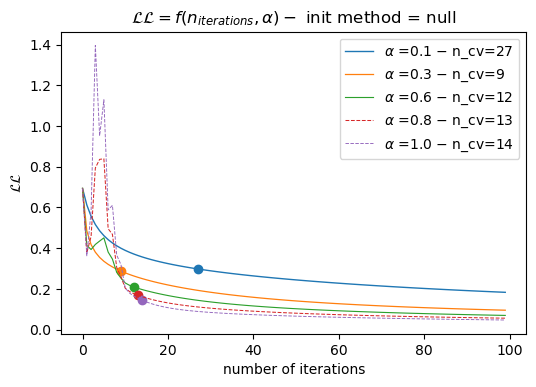

In [13]:
plt.figure(dpi=100)

# 2-for loops in order to ease the differenciation of the curves on the plot

for k in range(0,int(n_values/2+0.5)):
    plt.plot(Losses[k],linewidth = np.exp(-0.1*k),label=(r"$\alpha$ ={} $-$ n_cv={}".format(np.round(Alpha[k],1),CVs[k])))
    plt.scatter(CVs[k],Losses[k][int(CVs[k])])

for k in range(int(n_values/2+0.5),n_values):
    plt.plot(Losses[k],'--',linewidth = np.exp(-0.1*k),label=(r"$\alpha$ ={} $-$ n_cv={}".format(np.round(Alpha[k],1),CVs[k])))
    plt.scatter(CVs[k],Losses[k][int(CVs[k])])

Title =r"$\mathcal{LL}=f(n_{iterations},\alpha) -$ init method = "+"{}".format(method)

plt.xlabel('number of iterations')
plt.ylabel("$\mathcal{LL}$")
plt.legend()
plt.title(Title)
plt.show()

### 8.2/ init_method = RAND

In [14]:
n_values    = 5
alpha_min   = 1e-1
alpha_max   = 1
Alpha      = np.linspace(alpha_min,alpha_max,n_values)

eps_d       = 1e-2
eps_ll      = 0.3

Losses      = []
CVs         = []
method      = 'rand'

for k in range(n_values):
    Losses.append(perceptron(x,y,Alpha[k],100,init_method=method)[2])
    tmp = convergence(Losses[k],eps_d,eps_ll)[0]
    CVs.append(tmp)


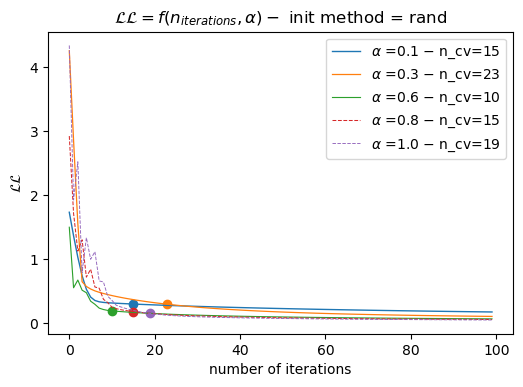

In [15]:
plt.figure(dpi=100)

# 2-for loops in order to ease the differenciation of the curves on the plot

for k in range(0,int(n_values/2+0.5)):
    plt.plot(Losses[k],linewidth = np.exp(-0.1*k),label=(r"$\alpha$ ={} $-$ n_cv={}".format(np.round(Alpha[k],1),CVs[k])))
    plt.scatter(CVs[k],Losses[k][int(CVs[k])])

for k in range(int(n_values/2+0.5),n_values):
    plt.plot(Losses[k],'--',linewidth = np.exp(-0.1*k),label=(r"$\alpha$ ={} $-$ n_cv={}".format(np.round(Alpha[k],1),CVs[k])))
    plt.scatter(CVs[k],Losses[k][int(CVs[k])])

Title =r"$\mathcal{LL}=f(n_{iterations},\alpha) -$ init method = "+"{}".format(method)

plt.xlabel('number of iterations')
plt.ylabel("$\mathcal{LL}$")
plt.legend()
plt.title(Title)
plt.show()

## 9/ Validation
***

### 9.1/ Spliting the dataset
the notations are :
- $n_{folds}$ : number of folds we want to generate
- $x,y\_ split$ : respectively, array containing all the subsets of the original $\{x,y\}$
- $x,y\_ copy$ : respectively, array containing a copy of the original $\{x,y\}$
- $j$ : a counter to decrease the size of the $(x,y\_ copy)$ each time we randomly take an element in it
- $fold\_ size$ : the number of samples in each folds
- $fold\_ x,y$ : temporary variables in which are saved the folds which will be concatenated into the $(x,y\_ split)$
- $index$ : randomly chosen index of the element to add to the $(fold\_ x,y)$ array
- $X,Y\_s$ : final training and validation sets

the functions are:
- *cross_validation_split* : to split the original dataset into 2 sets :
    - 1st set : training set
    - 2nd set : validation set

In [16]:
# inputs :
#	x,y		: the original dataset
# 	n_folds	: the number of folds desired

# outputs :
#	x,y_split	: the splitted datasets

def cross_validation_split(x,y,n_folds):

	# variables declarations
	x_split 		= []
	y_split 		= []
	x_copy 			= list(x)
	y_copy 			= list(y)
	j				= -1

	# calculation of size of each folds
	fold_size 		= int(n_samples/n_folds)

	# for each folds
	for k in range(n_folds):

		# temporary folds
		fold_x		= []
		fold_y		= []

		# while the fold is not full
		while len(fold_x)<fold_size:
			j		= j+1

			# we randomly chose an index of the element to withdraw from the copies of the original sets
			index 	= randrange(n_samples-j)

			# then we add the corresponding element into the temporary folds
			fold_x.append(x_copy.pop(index))
			fold_y.append(y_copy.pop(index))

		# we concatenate the subsets
		x_split.append(fold_x)
		y_split.append(fold_y)
	
	# sizes manipulations to enable data processing by the perceptron algorithm
	X_s, Y_s = np.array(x_split),np.array(y_split)

	X_s0    = np.array([X_s[k][:,0] for k in range(n_folds-1)]).flatten()[np.newaxis,:]
	X_s1    = np.array([X_s[k][:,1] for k in range(n_folds-1)]).flatten()[np.newaxis,:]

	X_s     = np.concatenate((X_s0,X_s1),axis = 0)[np.newaxis,:]
	Y_s     = np.array([Y_s[k][:,0] for k in range(n_folds-1)]).flatten()

	return X_s,Y_s


No handles with labels found to put in legend.


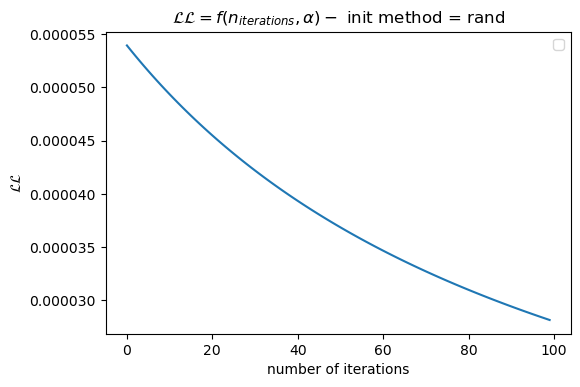

In [26]:
method          = "rand"
n_folds         = 2
learning_rate   = 1
n_iterations    = 100

X_s,Y_s         = cross_validation_split(x,y,n_folds)
B,W,L           = perceptron(X_s[0],Y_s[0],alpha = learning_rate,n=n_iterations,init_method=method)

Title           = r"$\mathcal{LL}=f(n_{iterations},\alpha) -$ init method = "+"{}".format(method)

plt.figure(dpi=100)
plt.plot(L)
plt.xlabel('number of iterations')
plt.ylabel("$\mathcal{LL}$")
plt.legend()
plt.title(Title)
plt.show()
plt.show()